# 機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集 
複習所學的知識點，並依照每日所學逐步建立出解答

### Day032 - 機器學習: 流程與步驟
1. 資料搜集、前處理: 
    - 資料前處理: 缺失值填補、離群值處理、標準化
    
2. 定義目標與評估準則:
    - 定義目標:
        回歸問題? 分類問題?  <br>
        要預測的目標是甚麼? (target 或 y)  <br>
        要用甚麼資料來進⾏預測? (predictor 或 x)  <br>
        將資料分為
        - 訓練集, training set
        - 驗證集, validation set
        - 測試集, test set
        
    - 設定評估準則: 不同問題有不同的評估指標
        - 回歸問題 (預測值為實數):
            - RMSE, Root Mean Square Error
            - Mean Absolute Error
            - R-Square
        - 分類問題 (預測值為類別):
            - Accuracy
            - F1-score
            - AUC, Area Under Curve
            
 
3. 建立模型與調整參數:
    - 根據設定目標建立機器學習模型
    - 各模型都有其超參數需調整，根據經驗與對模型了解、訓練情形等進⾏調參
    
    
4. 導入:
    - 建立資料搜集、前處理等流程
    - 送進模型進⾏預測
    - 輸出預測結果
    - 視專案需求整合前後端: 建議統⼀資料格式，方便讀寫 (.json, .csv)

### Day001 - 資料介紹與評估指標
這部分將回答以下四個問題:
1. 為什麼這個問題重要？
> 可以透過高階經理人內部的mail來往以及薪資、股票等財務特徵來找出可疑的詐欺犯罪者

2. 資料從何而來？
> Email資料來自[Enron Email Dataset](https://www.cs.cmu.edu/~./enron/)，由CALO Project收集 <br>
財務資料來自[FindLaw.com](http://www.findlaw.com)

3. 資料的型態是什麼？
> 資料的型態為結構化資料， 有關財務的特徵共有14個(單位皆為美元)，分別為
    - salary
    - deferral_payments
    - total_payments
    - loan_advances
    - bonus
    - restricted_stock_deferred
    - deferred_income
    - total_stock_value
    - expenses
    - exercised_stock_options
    - other
    - long_term_incentive
    - restricted_stock
    - director_fees
    
    > 有關 email 的特徵共有六個(除了 email_address，其餘皆為次數)，分別為
    - to_messages
    - email_address
    - from_poi_to_this_person
    - from_messages
    - from_this_person_to_poi
    - shared_receipt_with_poi
    
    > 要預測的目標為POI label: [‘poi’] (boolean, represented as integer)

4. 我們可以回答什麼問題？
> Kaggle的評估指標為 AUC

### Day002 - EDA: 讀取資料 & Data summary
EDA指的是初步透過視覺化/統計工具進行分析，達到三個主要目的
1. 了解資料: 獲取資料所包含的資訊、結構和特點
2. 發現 outliers 或異常數值: 檢查資料是否有誤
3. 分析各變數間的關聯性: 找出重要的變數

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set data_path
dir_data = '../Data/Mid/'

# Load in data
df_train = pd.read_csv(dir_data + 'train_data.csv')
df_test = pd.read_csv(dir_data + 'test_features.csv')
df_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


#### 行與欄的總數

In [2]:
df_train.shape

(113, 22)

#### 各欄的資料型態與是否有缺失值

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

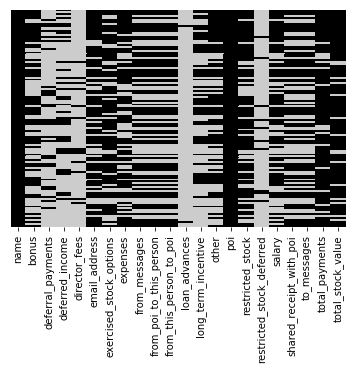

In [25]:
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='nipy_spectral');

In [28]:
df_train.isnull().sum()

name                           0
bonus                         52
deferral_payments             85
deferred_income               79
director_fees                100
email_address                 30
exercised_stock_options       32
expenses                      40
from_messages                 48
from_poi_to_this_person       48
from_this_person_to_poi       48
loan_advances                111
long_term_incentive           64
other                         44
poi                            0
restricted_stock              31
restricted_stock_deferred    103
salary                        40
shared_receipt_with_poi       48
to_messages                   48
total_payments                17
total_stock_value             15
dtype: int64

> 可以看出很多欄位有大量缺失值，其中director_fees、loan_advances、restricted_stock_deferred甚至有破百個缺失值

#### 資料中各個欄位類型的數量

In [4]:
df_train.dtypes.value_counts()

float64    19
object      2
bool        1
dtype: int64

> 由上面可以看出總共有22個columns，其中有2個類別型欄位，分別是name與email_address，這兩個應該都與預測關係不大，可以先不用處理，另外目標變數poi是boolean型態

#### 了解Target variable - poi的分類比例

In [5]:
df_train.poi.value_counts()

False    100
True      13
Name: poi, dtype: int64

> poi的分布並不均勻，大部分的人都是清白的。

#### 總結統計數值

In [6]:
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


### Day005 - EDA: 資料分佈
以單變量分析來說，量化的分析方式可大致分為兩類
- 集中趨勢: 平均值(Mean)、中位數(Median)、眾數(Mode)
- 分散程度: 最小值(Min)、最大值(Max)、範圍(Range)、四分位差(Quartiles)、變異數(Variance)、標準差(Standar deviation)
使用上述的描述統計我們可以初步了解資料，並觀察是否有異常。

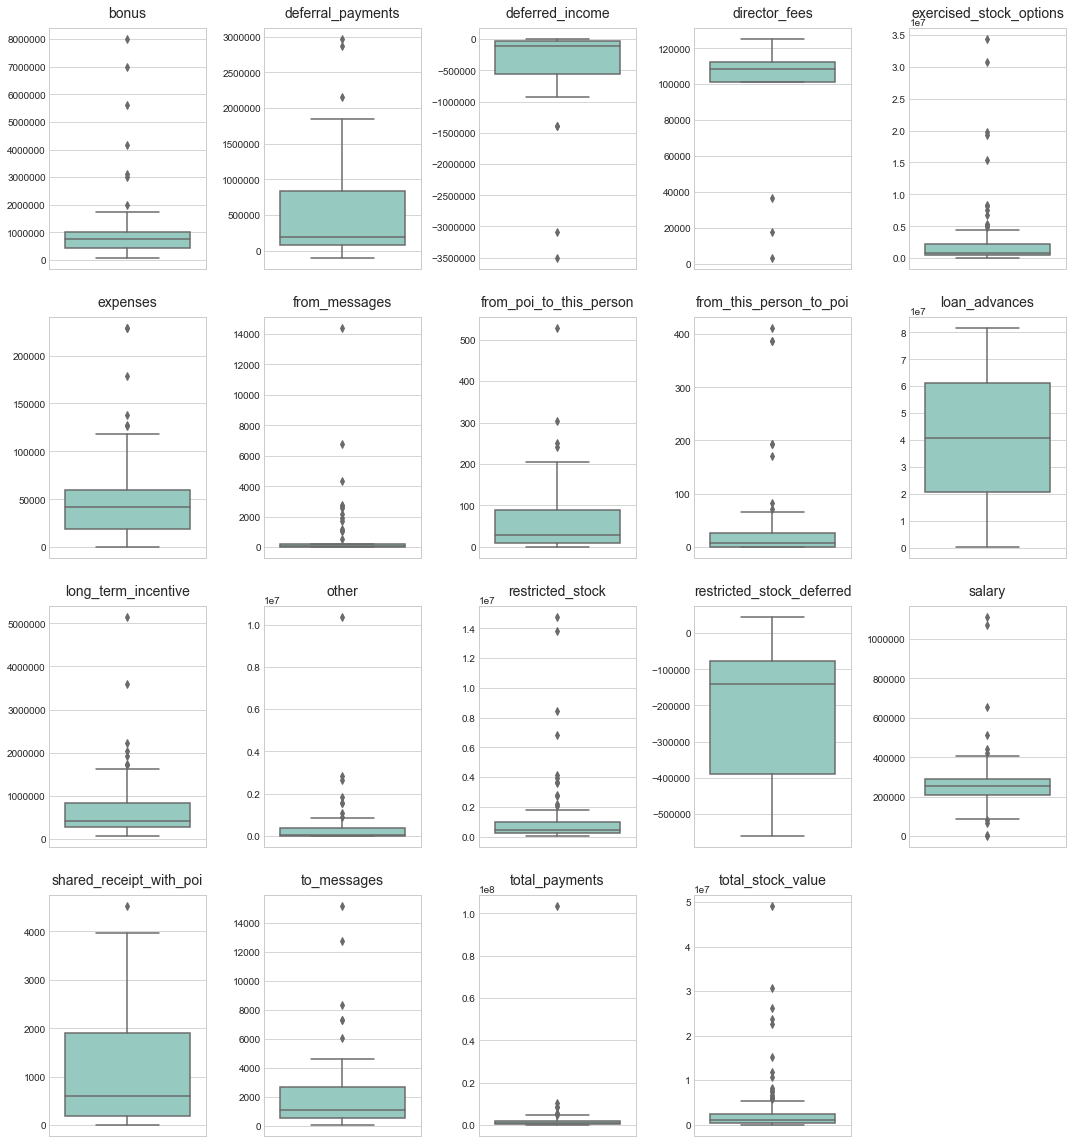

In [31]:
df_num = df_train.select_dtypes(exclude=["object", "bool"])
col = df_num.columns.values
number_of_columns = 5
number_of_rows = (len(col)-1)//number_of_columns + 1
plt.figure(figsize=(3*number_of_columns, 5*number_of_rows))

for i in range(0,len(col)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_num[col[i]], palette="Set3", orient='v')
    plt.title(col[i], size=14, y=1.02)s
    plt.ylabel('')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)